# MNIST

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [3]:
import seaborn as sns
import copy

def load_data(save_path):
    datas = list()
    path_list = glob.glob(save_path)
    data_temp_ = get_concat_glob(path_list)
    # print()
    data_temp_["a1"] = data_temp_["a1"] * 100
    data_temp_["a3"] = data_temp_["a3"] * 100
    data_temp_['Distribution'] = data_temp_['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    # data_temp['Mode'] = data_temp['Mode'] .map({'fedavg': "FedAvg", 
    #                                             'fedprox': "FedProx", 
    #                                             'scaffold': "Scaffold",  
    #                                             'feddyn': "FedDyn", 
    #                                             # 'G11': "FedGN",
    #                                            })
    # print(data_temp["Mode"].unique())
    # sk = ["Balanced IID partition", "Balanced Dirichlet partition (α=0.3)"]
    # data_temp = data_temp.set_index('Distribution').loc[sk].reset_index()
    # sk = ['FedAvg', 'FedProx', 'Scaffold', 'FedDyn']
    # data_temp = data_temp.set_index('Mode').loc[sk].reset_index()
    # print(data_temp.size)
    return data_temp_

# data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")

In [26]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):
        data = pd.read_csv(path)
        data["Mode"] = data["mode"]

        if "ortho" in path: continue
        if "GNStop" in path: continue
        if "G15" in path: continue
        if "L10" in path: continue
        if "SWA" in path: continue
        if "FConly" in path: continue
        if "FCs" in path: 
            if "CIFAR10-fedavg-G05-B0-D0-N100-P0.01__FCs0.0E5b1_Mean5-LR0.1" in path: pass
            else: continue
        elif "w1b1" in path: continue
        elif "w1b1" in path: continue
        elif "w1" in path and "ctw1" not in path: continue
        elif "b1" in path: continue
        if "fc" in path:
            continue
        elif "ec" in path:
            continue
        elif "FCs" in path and "Mean5" not in path:
            continue
        if "PCOS" in path: continue
        if "BN" in path and "noBN" not in path: continue

        data = pd.read_csv(path)
        data["Mode"] = data["mode"]


            
        if "Mean1-" in path:
            data["Mean"] = "M1"
        elif "Mean1_" in path:
            data["Mean"] = "M1"
        elif "Mean16" in path: continue
        elif "Mean14" in path: continue
        elif "Mean13" in path: continue
        elif "Mean2_" in path or "Mean2-" in path:
            data["Mean"] = "M2"
            if "LR0.15" in path: continue
            elif "LR0.12" in path: continue
            elif "LR0.08" in path: continue
            elif "LR0.05" in path: continue
            elif "LR0.02" in path: continue
        elif "Mean3-" in path: continue
        elif "Mean4-" in path: continue
        elif "Mean5-" in path:
            data["Mean"] = "M5"
        elif "Mean5_" in path:
            # print(path)
            data["Mean"] = "M5"
        elif "Mean51-" in path: continue
        elif "Mean52-" in path: continue
        elif "Mean53-" in path: continue
        elif "Mean11-" in path:
            data["Mean"] = "M11"
        elif "Mean21-" in path:
            data["Mean"] = "M21"
        elif "Mean22-" in path: continue
        elif "Mean23-" in path:
            data["Mean"] = "M23"
        elif "Mean24-" in path:
            data["Mean"] = "M24"
        elif "Mean25-" in path:
            data["Mean"] = "M25"
        elif "Mean6-" in path: continue
        elif "LogitNorm_BNinit0" in path:
            data["Mode"] += "LogitNorm+BN"
            continue
        else:
            data["Mean"] = "None"

        if "ortFC1" in path: 
            data["Mean"] += "+ ort1"
            continue
        elif "ortFC2" in path: 
            data["Mean"] += "+ ort2"
            continue
        elif "ortFC3" in path: 
            data["Mean"] += "+ ort3"
        elif "ortFC4" in path: 
            data["Mean"] += "+ ort4"
        elif "ortFC7" in path: 
            data["Mean"] += "+ ort7"

        if "G11" in path: 
            data["Mode"] += "_G11"
            continue

        if "ctw" in path: 
            data["Mean"] += " (ctw " + path.split("ctw")[1][0] + ")"
            continue
            
        if "LN" in path:
            data["Mean"] += "+LN"
            continue

        if "outft" in path:
            data["Mean"] += "_DRL"

        if len(data_) == 0: 
            data_ = data
        else: 
            # print(path)
            data_ = pd.concat([data_, data])
    return data_

(3342, 21)


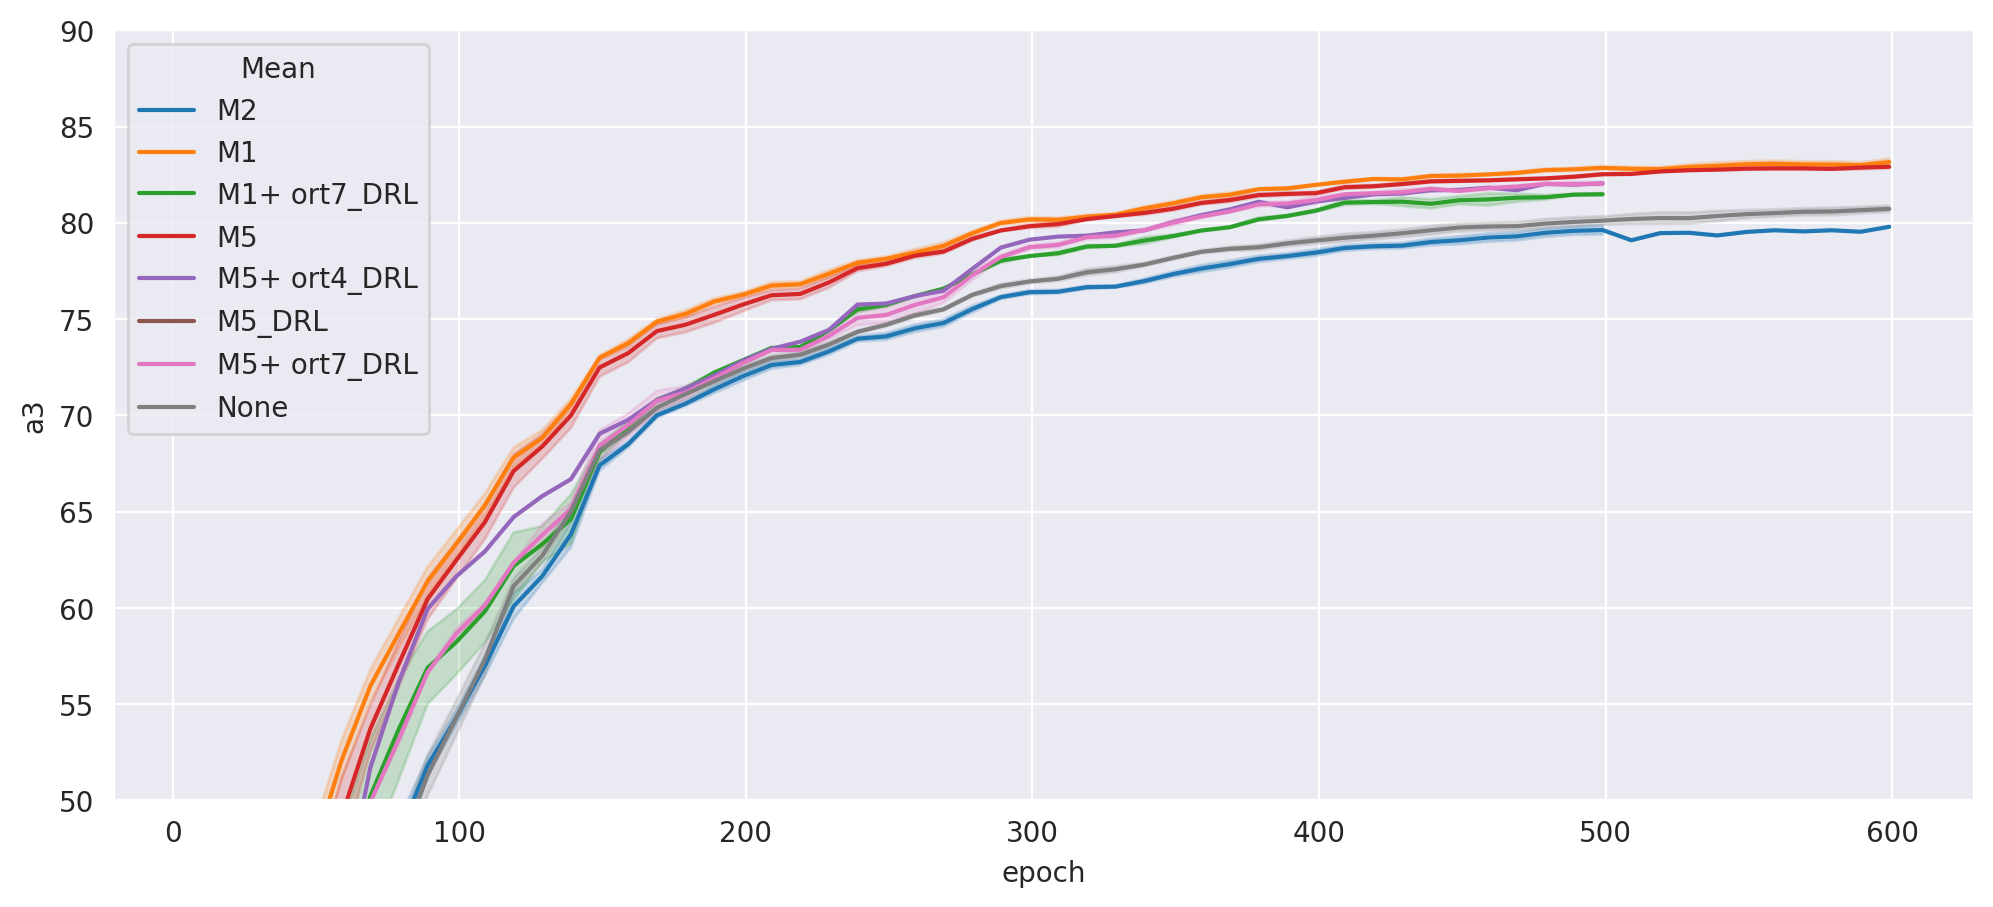

In [40]:
data_temp = load_data("../Output/CIFAR10-*-N100-*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 1, figsize=(12,5), dpi=200, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] <= 599]
    # temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    print(temp.shape)
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    temp = temp[(temp["Mode"]=="fedavg")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mean", ax=ax, errorbar="se")
    ax.set_ylim(50,90)

(13010, 21)


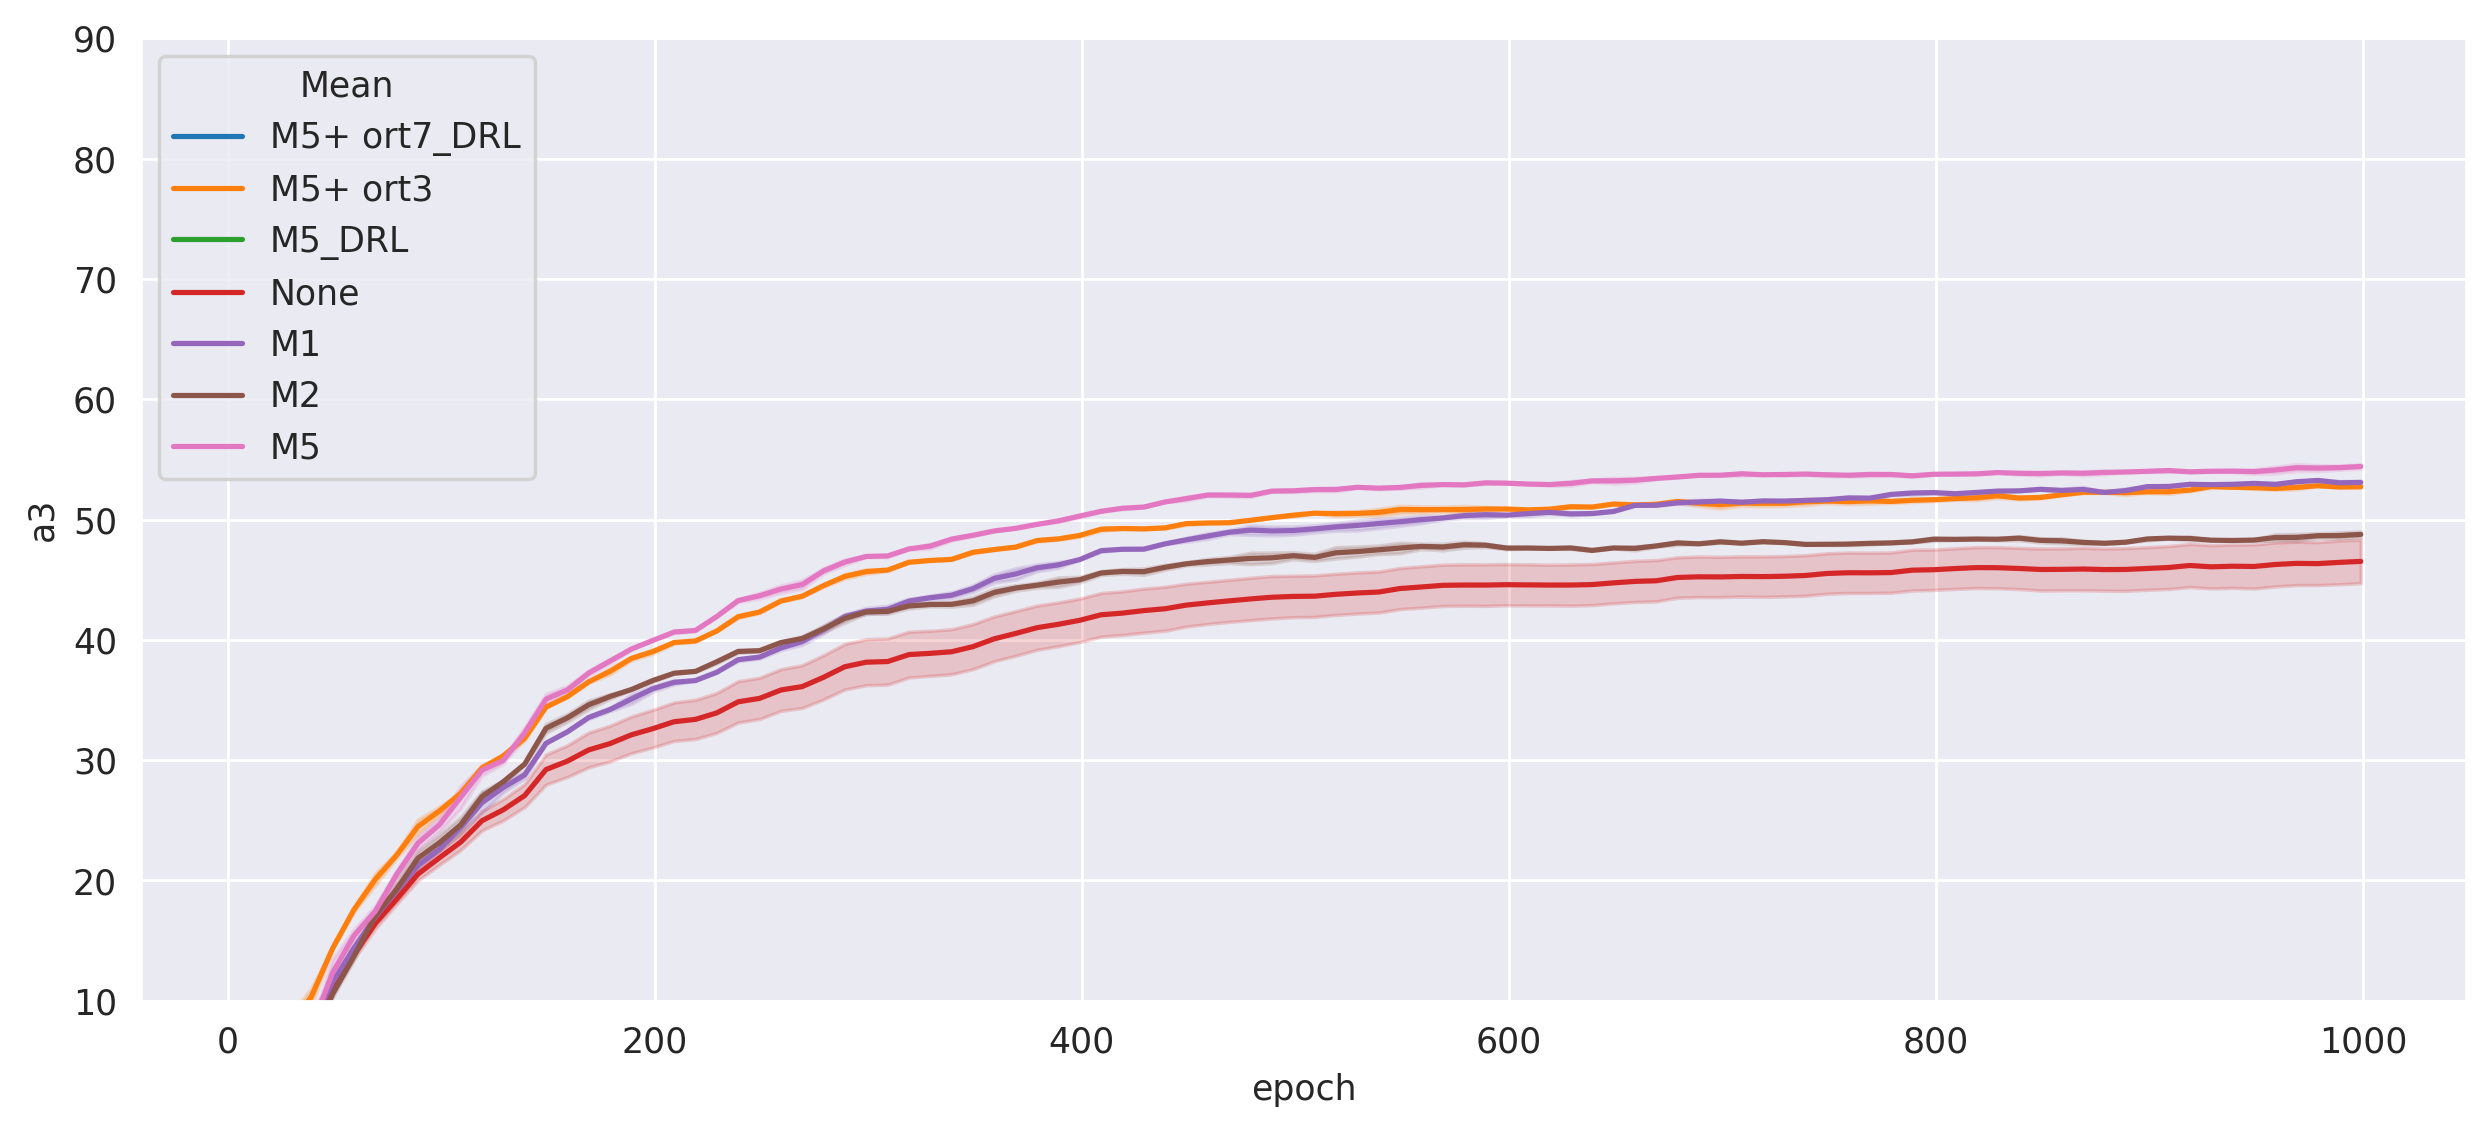

In [35]:
data_temp = load_data("../Output/CIFAR100-*-N100-*/s[1-9].csv")
# data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 1, figsize=(12,5), dpi=250, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] <= 999]
    # temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    print(temp.shape)
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    temp = temp[(temp["Mode"]=="fedavg")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mean", ax=ax, errorbar="se")
    ax.set_ylim(10,90)

(134, 21)


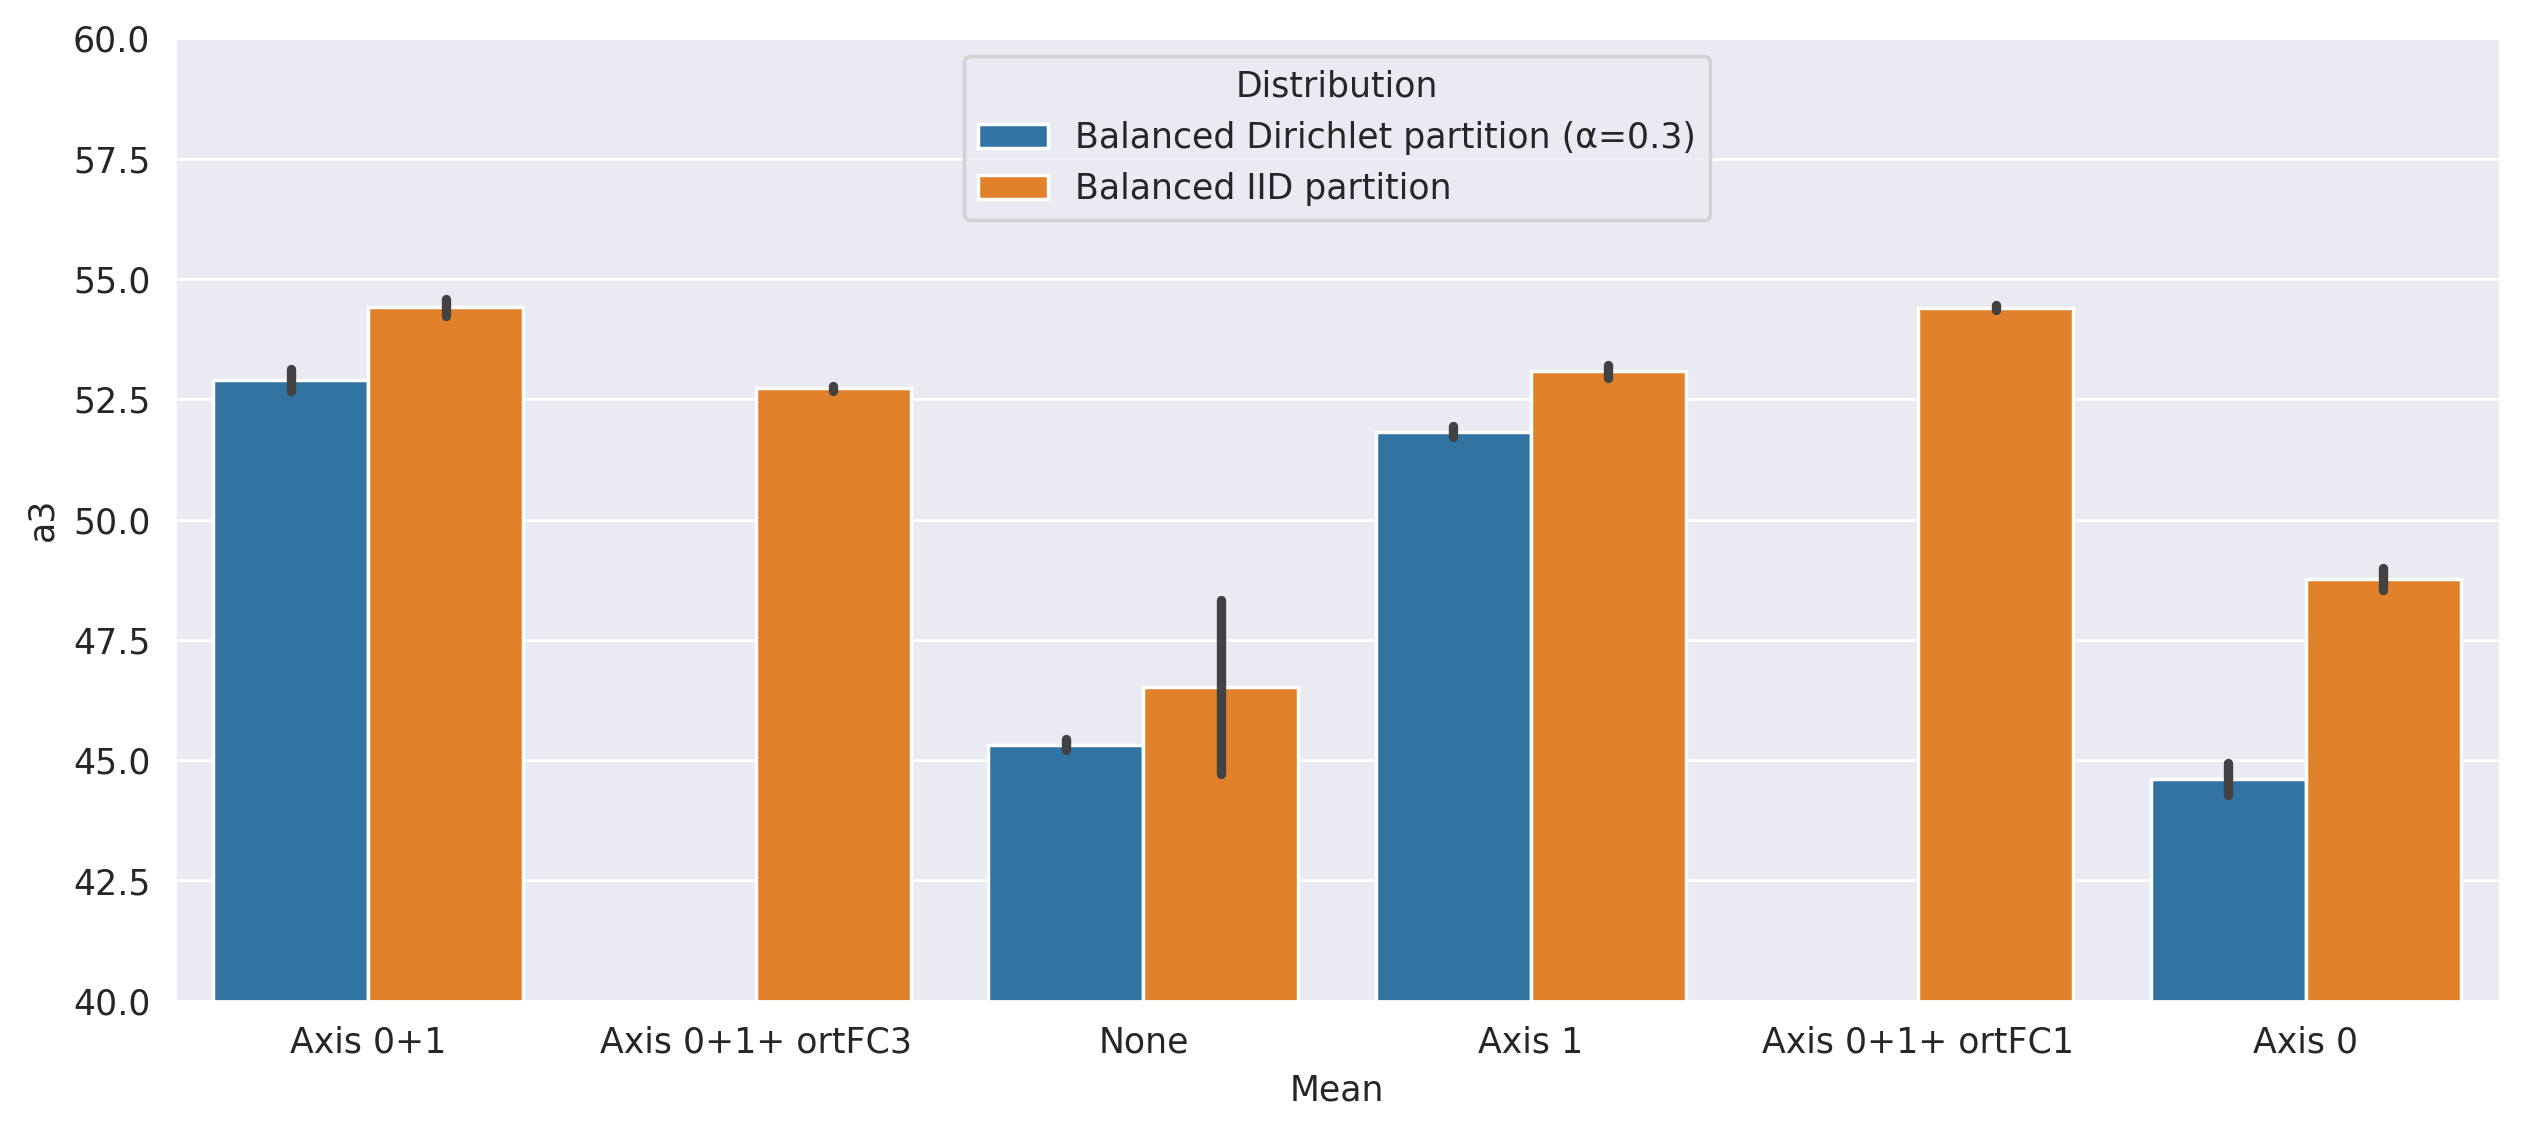

In [18]:
data_temp = load_data("../Output/CIFAR100-*-N100-*/s[1-9].csv")
# data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 1, figsize=(12,5), dpi=250, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 999]
    # temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    print(temp.shape)
    # temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    temp = temp[(temp["Mode"]=="fedavg")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.barplot(data=temp, x="Mean", y="a3", hue="Distribution", ax=ax, errorbar="se")
    ax.set_ylim(40,60)

In [5]:
temp["Mean"].unique()

array(['Axis 0+1 (ctw 1)', 'Axis 1', 'Axis 1 (ctw 3)', 'Axis 0+1 (ctw 3)',
       'Axis 0+1', 'Axis 1 (ctw 2)', 'Axis 0+1 (ctw 2)', 'Axis 1 (ctw 1)',
       'None'], dtype=object)

../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_ctw1-LR0.1/s1.csv
../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_ctw1-LR0.1/s2.csv
../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_ctw3-LR0.1/s1.csv
../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_ctw3-LR0.1/s2.csv
../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_ctw2-LR0.1/s1.csv
../Output/CIFAR10-fedavg-G05-B0-D0-N100-P0.01__Mean5_ctw2-LR0.1/s2.csv
(62, 21)


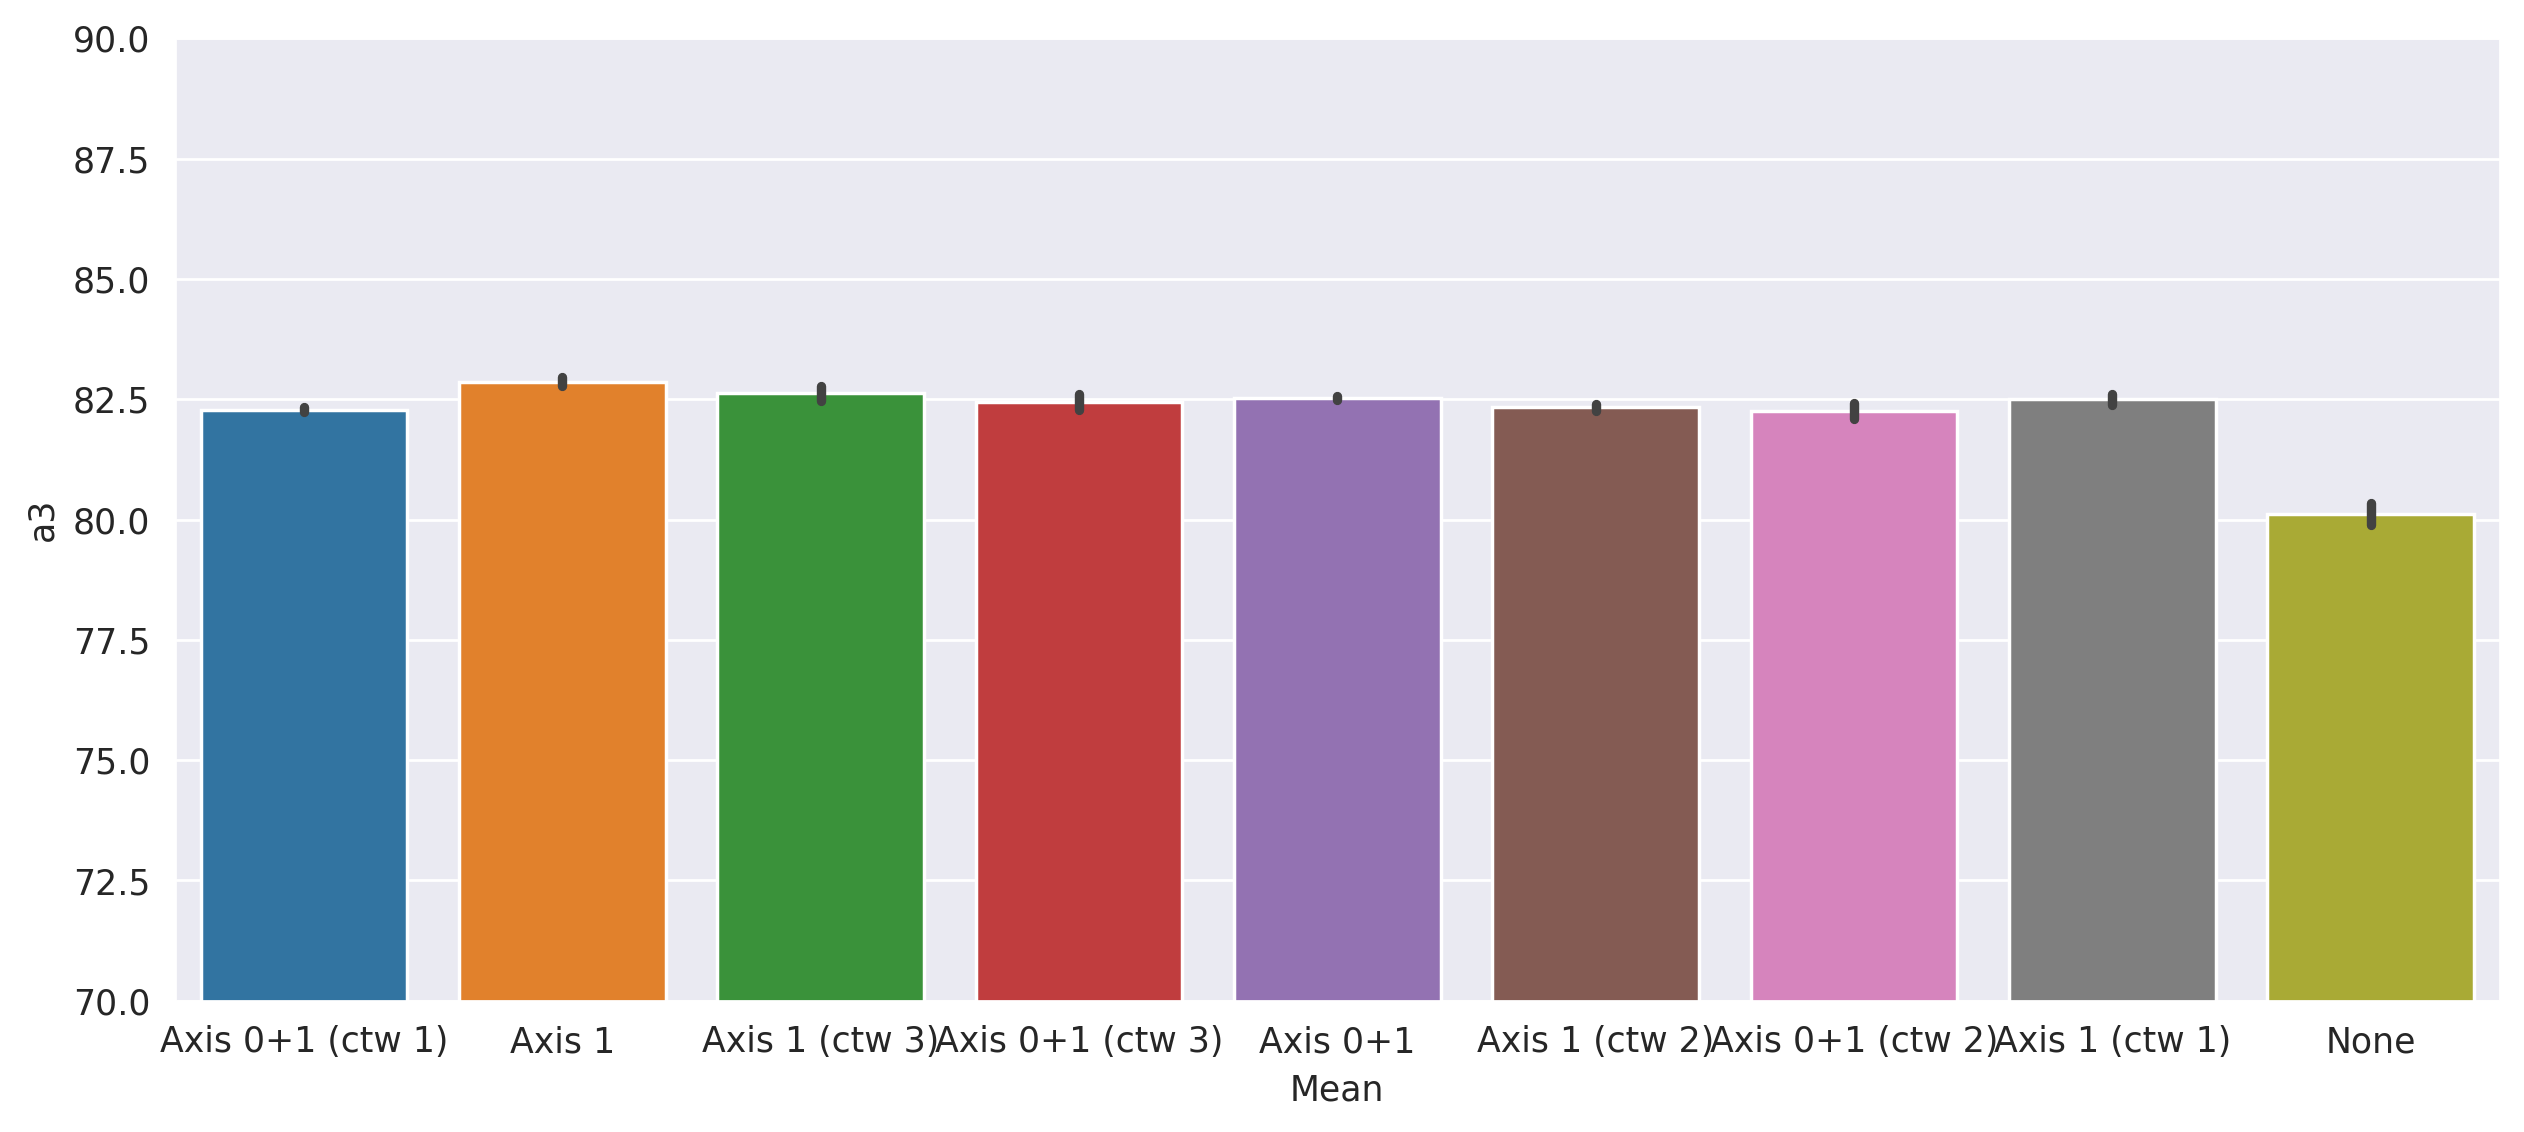

In [6]:
data_temp = load_data("../Output/CIFAR10-*-N100-*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

# sk = ["None", "Axis 0", "Axis 1", "Axis 0+1"]
# data_temp = data_temp.set_index('Mean').loc[sk].reset_index()

fig, axes = plt.subplots(1, 1, figsize=(12,5), dpi=250, sharey=False)
sns.set_style("darkgrid")
for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 499]
    # temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    print(temp.shape)
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    temp = temp[(temp["Mode"]=="fedavg")]
    # ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax = sns.barplot(data=temp, x="Mean", y="a3", ax=ax, errorbar="se")
    ax.set_ylim(70,90)